# BoomBike Sharing Assignment

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, company wants to get the factors affecting the application and become profitable soon.

Buissiness Objective: <br>
- Which variables are significant in predicting the demand for shared bikes. <br>
- How well those variables describe the bike demands

### Steps which will be followed to develop the model
* Reading and understanding the Data
* Exploratory Data Analysis : EDA
* Data Preparaion
* Normalizing and Scaling
* Feature selection
* Model Building and Evaluation

# Step 1 - Reading and Understanding the Data

In [1]:
# importing required packages

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')    #ignoring the warnings

In [2]:
#importing dataset

boomBike = pd.read_csv('day.csv')

#displaying top 5 results
boomBike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Drilling down the data dictionary
dteday = it is the date column <br>
season = there are 4 seasons in the dataset (1:spring, 2:summer, 3:fall, 4:winter) <br>
year, month = obvious columns<br>
holiday = 1 being a holiday and 0 being not<br>
weekday = day of the week<br>
workingday = if day is neither weekend nor holiday is 1, otherwise is 0<br>
weathersit = depending on the weather there are 4 categories<br>
temp = temperature<br>
atemp = feeling temperature<br>
hum = humidity<br>
windspeed = wind speed<br>
casual = count of casual users<br>
registered = count of registered users<br>
cnt = count of total rental bikes including both casual and registered<br>

In [3]:
#size of data
boomBike.shape

(730, 16)

In [4]:
#data type and more information about data
boomBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#we have a separate column for year and month, so whole date column is not of much sense and it will have all different values
#so dteday is of no use we can drop
#temp and feeling temperature are generally same in case of numbers
# there are other columns as well which will not be of help in our analysis.
# so we drop all of such kind

boomBike.drop(['instant', 'dteday', 'atemp', 'casual', 'registered'], axis=1, inplace=True)

# Step 2 - Exploratory Data Analysis : EDA

In [6]:
#descvribing the data
boomBike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


In [7]:
# Check for duplicate data
dups = boomBike.duplicated()
print('Duplicate rows= %d' % (dups.sum()))
boomBike[dups]

Duplicate rows= 0


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt


#### There are no duplicate rows in the dataset

In [8]:
# we will do a null check
boomBike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

#### There are no null values in the data set

In [9]:
#importing visualization packages

import matplotlib.pyplot as plt
import seaborn as sns

# Outliers Detection
We will be plotting the box plots of all dependent variables to check the Outliers

<AxesSubplot:>

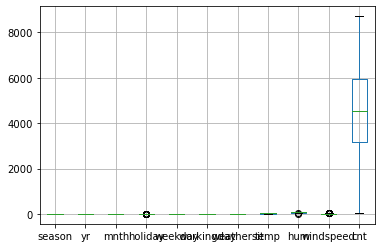

In [10]:
boomBike.boxplot()

Data for 'cnt' variable is in very high range as compared to the other variables. So we will be scaling the data later.

<AxesSubplot:>

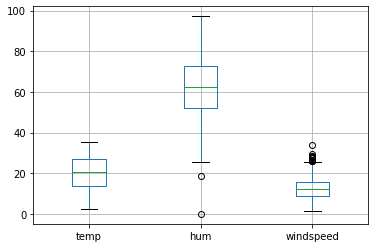

In [11]:
boomBike.boxplot(column=['temp', 'hum', 'windspeed'])

Temperature and Humidity are not having any Outliers but there are few in Windspeed, lets analyse that

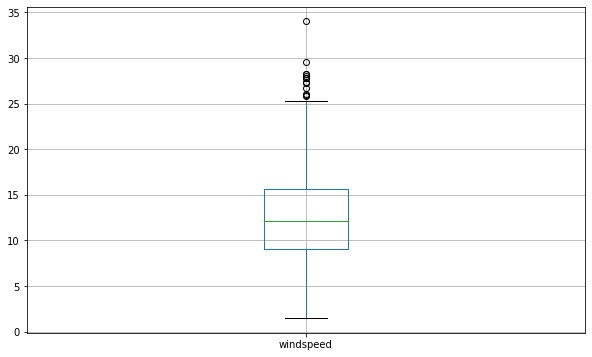

In [12]:
plt.figure(figsize=(10,6))
boomBike.boxplot(column=['windspeed'])
plt.show()

There are very few outliers in the above plot.

###### treating outliers using IQR technique

In [13]:
# q1,q3 = boomBike['windspeed'].quantile([0.25,0.75])
# print("First Quartlie- ", q1)
# print("Third Quartlie- ", q3)
# IQR = q3-q1
# print(IQR)
# lower = q1-(1.5*IQR)
# upper = q3 + (1.5*IQR)

In [14]:
# boomBike['windspeed']=np.where(boomBike['windspeed']>upper,upper,boomBike['windspeed'])
# boomBike['windspeed']=np.where(boomBike['windspeed']<lower,lower,boomBike['windspeed'])

In [15]:
# plt.figure(figsize=(10,6))
# boomBike.boxplot(column=['windspeed'])
# plt.show()

## Univariate Analysis

<AxesSubplot:xlabel='weathersit', ylabel='Density'>

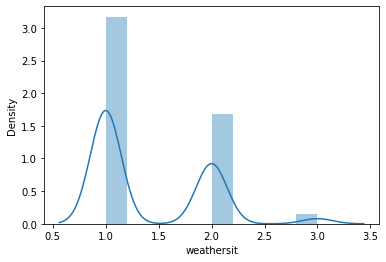

In [16]:
sns.distplot(boomBike['weathersit'])

We can clearly see that when the weather is Clear, Few clouds, Partly cloudy, Partly cloudy then it has the highest participation  where as it is close to no participation when it comes to extream weathers. But we can see the participation becomes half even with the slight change from the normal weather changes.

<AxesSubplot:xlabel='temp', ylabel='Density'>

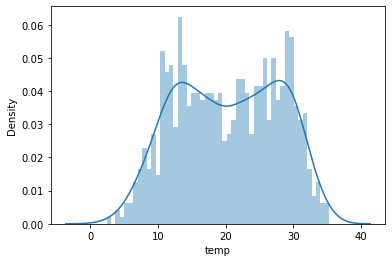

In [17]:
# sns.distplot(boomBike['hum'],bins=10)
# sns.distplot(boomBike['weekday'])    #almost equal distribution
# sns.distplot(boomBike['temp'],bins=20)
sns.distplot(boomBike['temp'],bins=50)

There seems to be an unusual spike at temp 30, but when we increase the bin size it doesnt looks suspious.

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

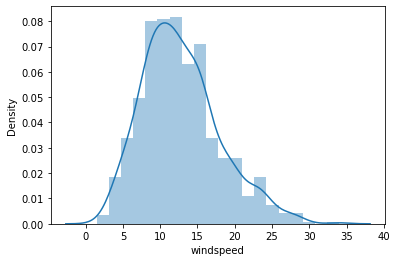

In [18]:
sns.distplot(boomBike['windspeed'],bins=20)

There is a huge spike at 10,15, 20, 25 but speed before and after that seems to be low, there is a possibility that figures are also rounded off to 10, 15, 20, 25

# Multivariate Analysis

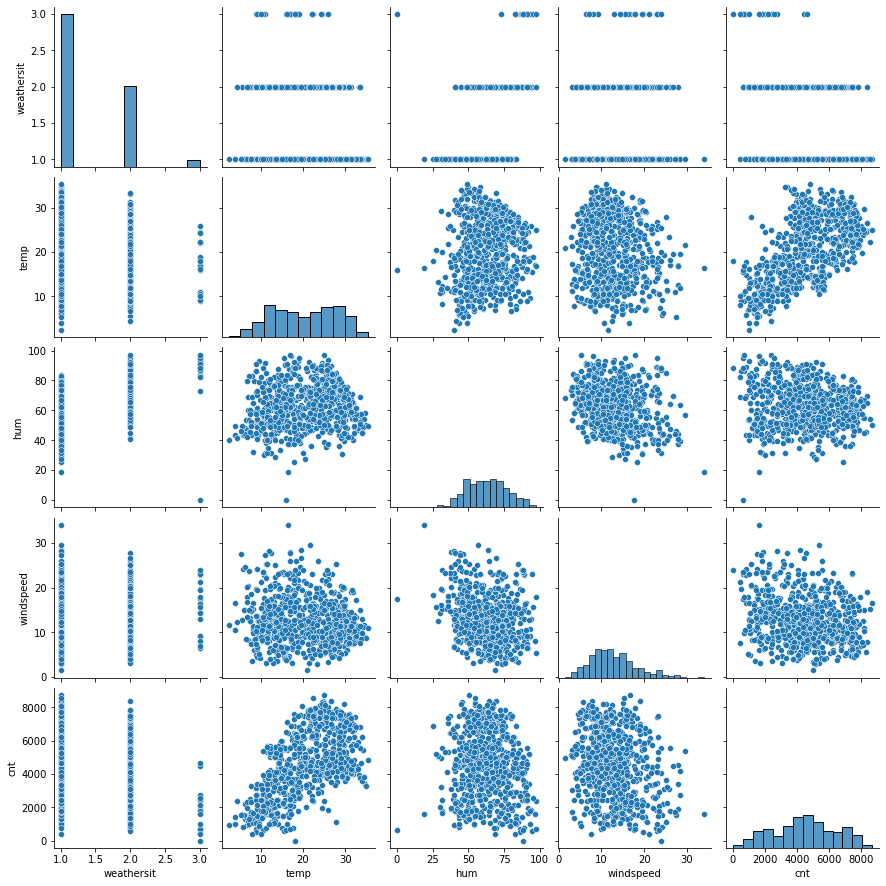

In [19]:
numeric_vars = ['weathersit','temp','hum','windspeed','cnt']
sns.pairplot(boomBike[numeric_vars])
plt.show()

Now lets visualise Categorical data

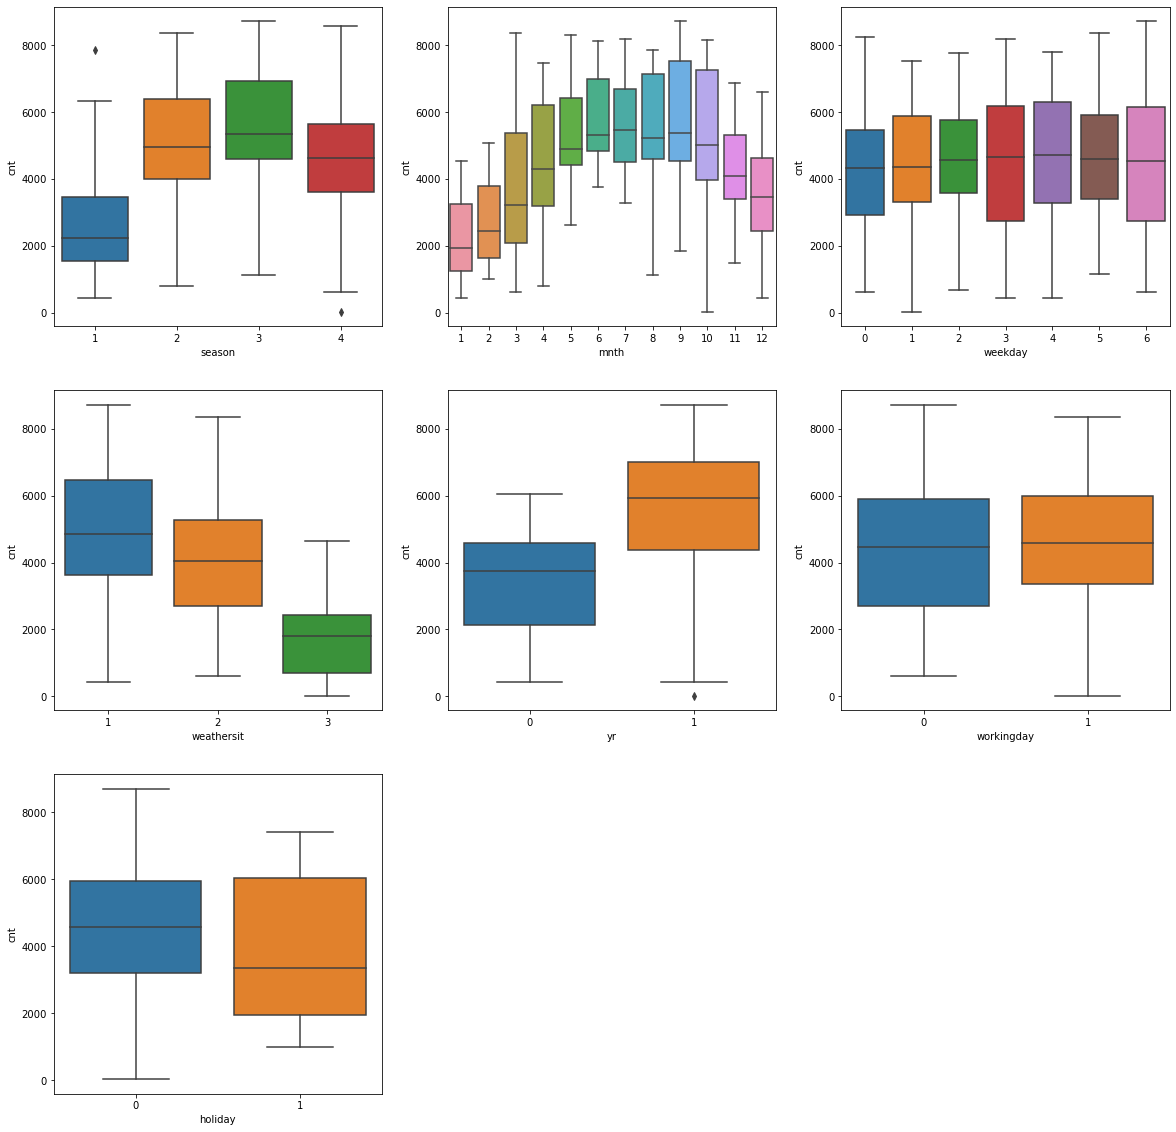

In [20]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boomBike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boomBike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = boomBike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boomBike)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = boomBike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boomBike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = boomBike)

plt.show()

These categorical variables are numeric so we should not be using them directly because they will then contribute to the model but reality is that these numbers have nothinng to do with their value.

In [21]:
label_season = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
label_weekday={1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',0:'Sun'}
label_month= {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
label_weathersit= {1:'Clear',2:'Misty',3:'Light Snow',4:'Heavy Rain'}

boomBike['season'] = boomBike.season.map(label_season)
boomBike['mnth'] = boomBike.mnth.map(label_month)
boomBike['weekday'] = boomBike.weekday.map(label_weekday)
boomBike['weathersit'] = boomBike.weathersit.map(label_weathersit)

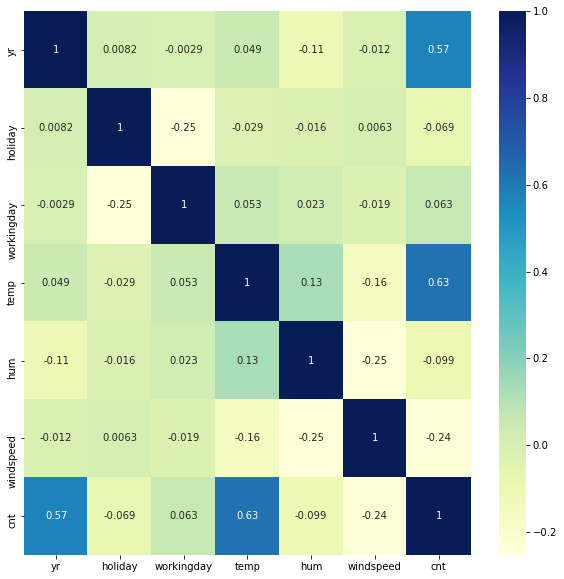

In [22]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(boomBike.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [23]:
boomBike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Step 3 - Data Preparation
#### Dummy Encoding

Categorical variables are having multiple levels, so we need to do the encoding

### One Hot Encoding

In [24]:
boomBike = pd.get_dummies(boomBike, drop_first=True)
boomBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_Spring          730 non-null    uint8  
 8   season_Summer          730 non-null    uint8  
 9   season_Winter          730 non-null    uint8  
 10  mnth_Aug               730 non-null    uint8  
 11  mnth_Dec               730 non-null    uint8  
 12  mnth_Feb               730 non-null    uint8  
 13  mnth_Jan               730 non-null    uint8  
 14  mnth_Jul               730 non-null    uint8  
 15  mnth_J

# Train Test Split

First step towards building a model is to split a training data and testing data. We will take 70-30 as a split ratio for this model

In [25]:
# importing the package for train test
from sklearn.model_selection import train_test_split

In [26]:
np.random.seed(0)
df_train, df_test = train_test_split(boomBike, test_size=0.3 , random_state=100)

print(df_train.shape)
print(df_test.shape)

(511, 29)
(219, 29)


# Step 4 - Normalizing and Scaling
We already saw that there is a huge difference between the scale of various variables in the dataset, so we will be using MinMaxScaling technique to scale the data

Scaling doesn't impact our model. It is extremely important to rescale the variables so that they have a comparable scale. There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will be using MinMax scaling for this model

In [27]:
#downloading the MinMaxScaler package
from sklearn.preprocessing import MinMaxScaler

#defining scaler
scaler = MinMaxScaler()

In [28]:
#we have to apply scaling on the numerical columns
numeric_var = ['temp', 'hum', 'windspeed','cnt']
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


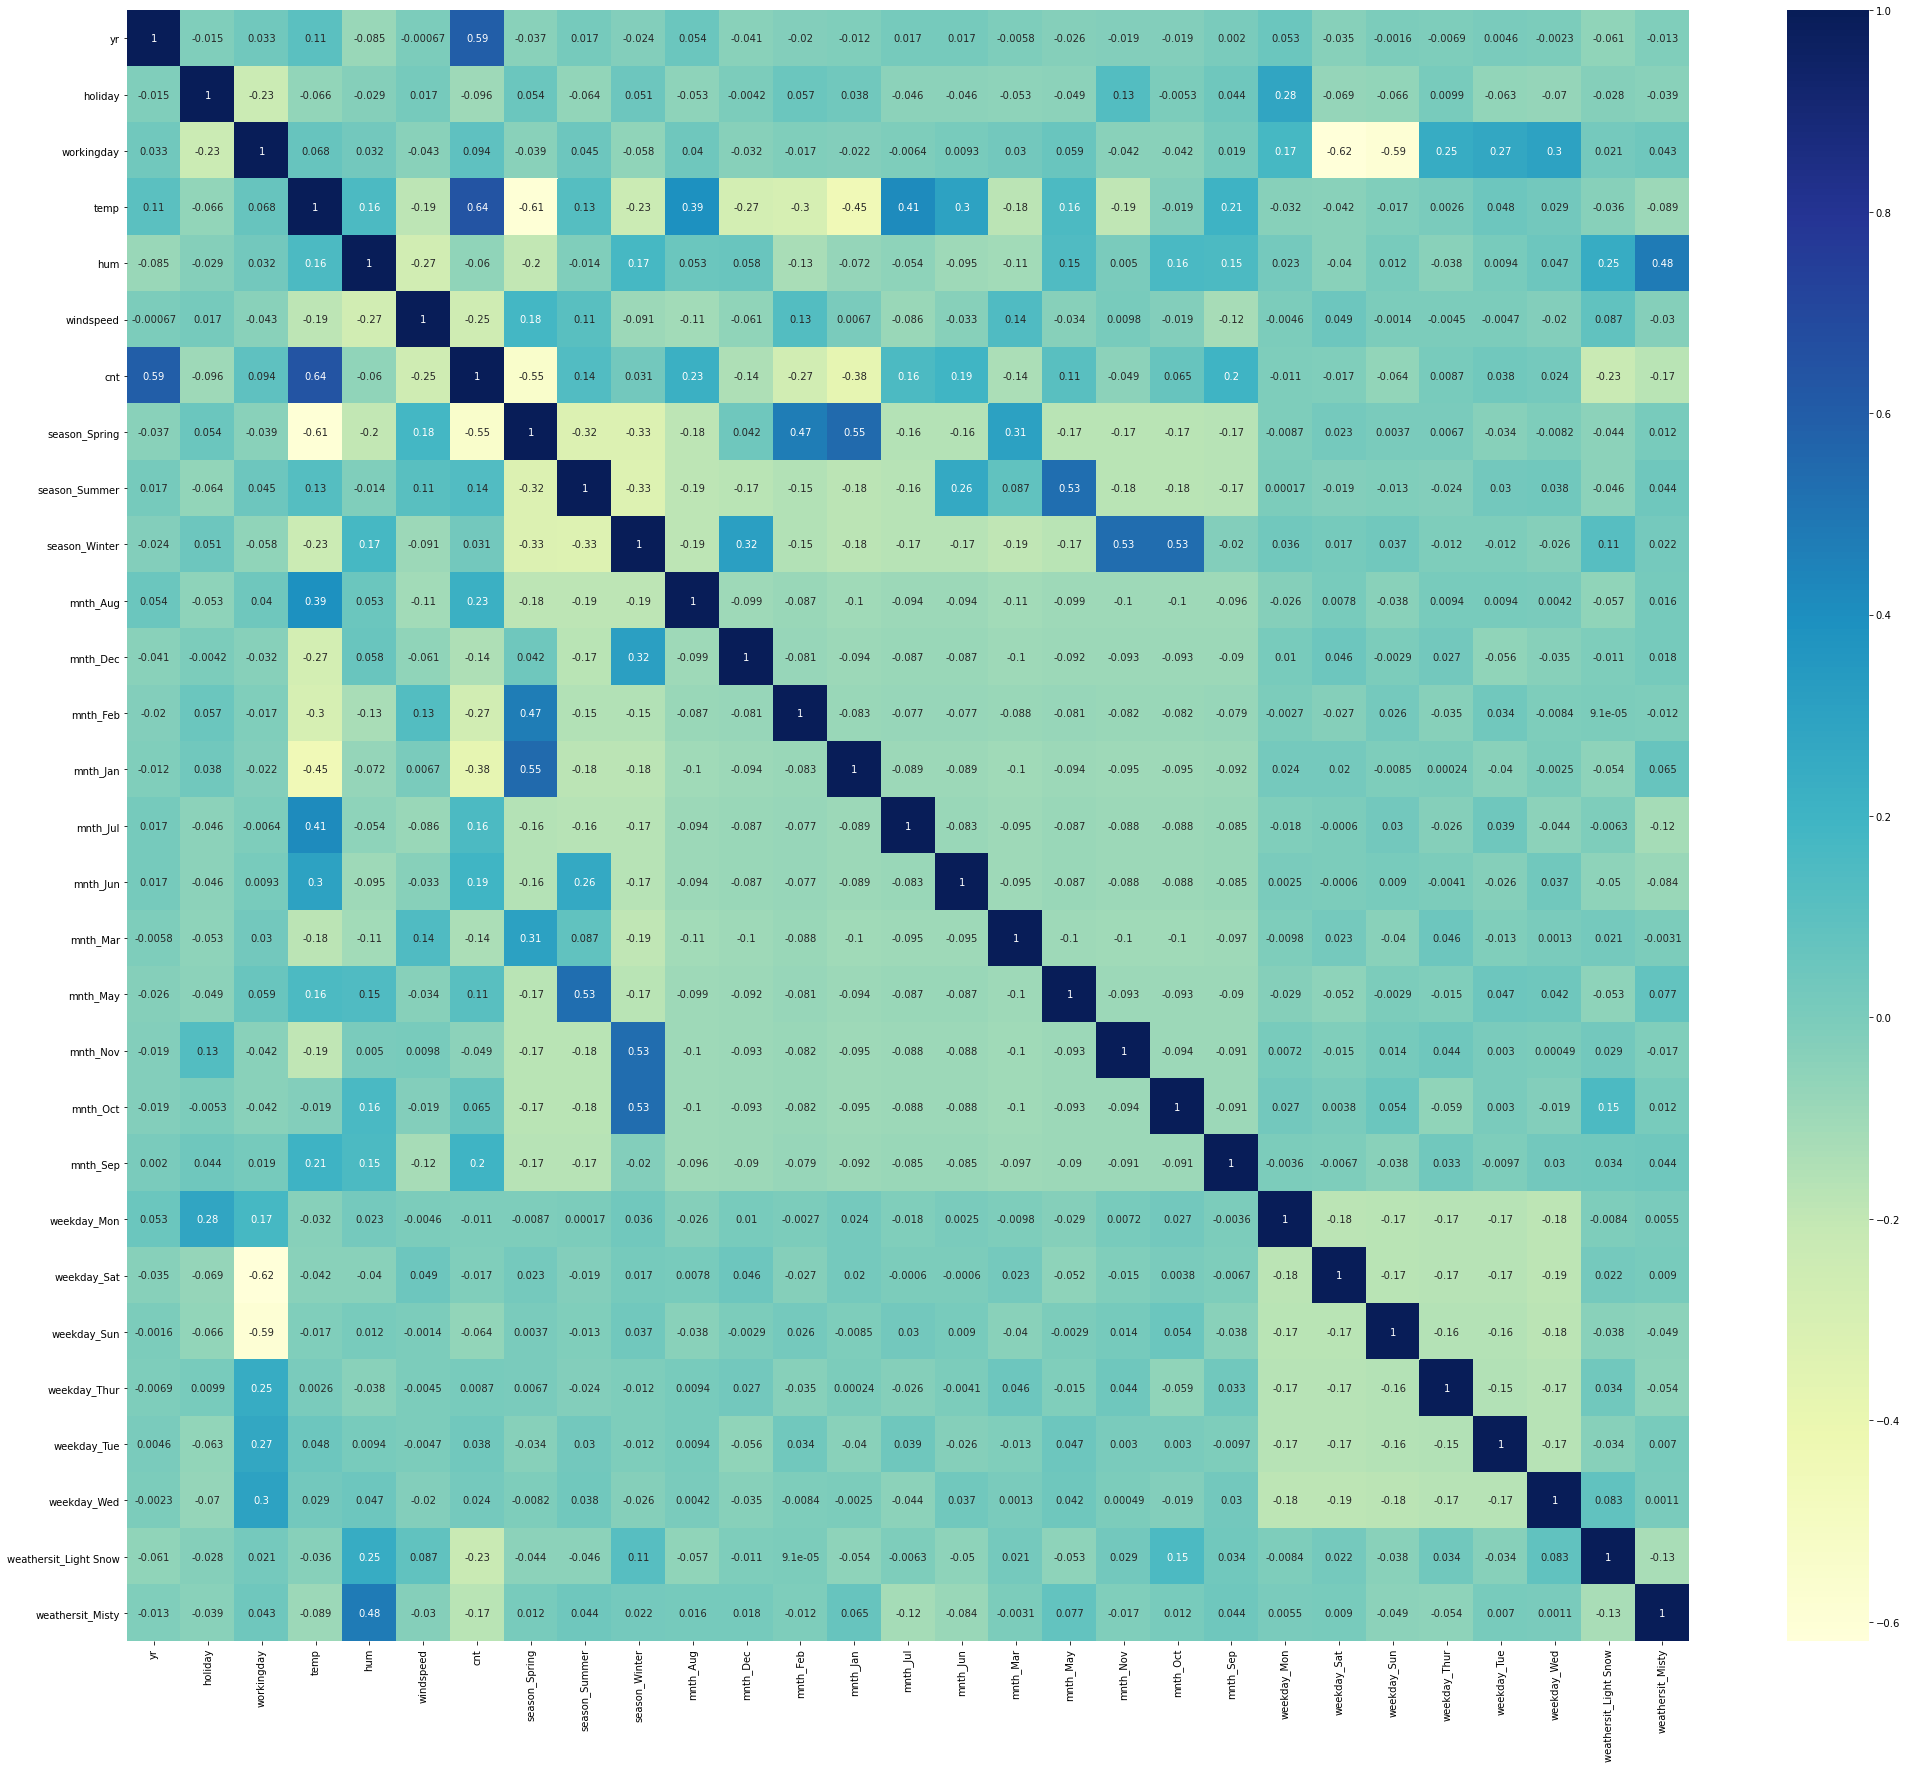

In [30]:
# checking the correlation coefficients to see which variables are correlated
plt.figure(figsize=(35,30))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

As we can see that 'cnt' seems to be highly correlated to 'temp'

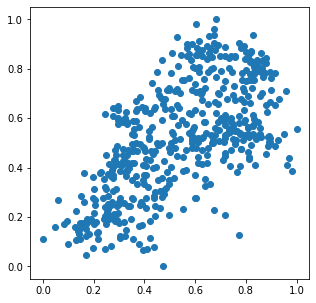

In [31]:
plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

The graph looks Linear and we can fit a straight line to this data.

### Dividing X and y data form df_train for model building

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5 - Feature Selection
RFE (Recursive Feature Elimination)

In [33]:
#importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

##### First iteration for model

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)

#running RFE
rfe = RFE(estimator = lm, n_features_to_select = 15,verbose=True)   # running RFE
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', False, 12),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 8),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 10),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Misty', True, 1)]

In [36]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfe.support_,
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Support,Ranking
0,yr,True,1
22,weekday_Sun,True,1
21,weekday_Sat,True,1
19,mnth_Sep,True,1
26,weathersit_Light Snow,True,1
12,mnth_Jan,True,1
9,mnth_Aug,True,1
8,season_Winter,True,1
27,weathersit_Misty,True,1
5,windspeed,True,1


In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow',
       'weathersit_Misty'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['season_Spring', 'mnth_Dec', 'mnth_Feb', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

# Step 6 - Building Linear Model
There are multiple ways to build a Linear model. Using sklearn and statsmodel.<br>
We will be using statsmodel as it gives descriptive summary.

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
X_train_rfe.shape

(511, 15)

In [41]:
import statsmodels.api as sm


you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default

In [42]:
#Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
X_train_rfe.shape

(511, 16)

In [44]:
#running Linear Model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.68e-192
Time:                        14:13:24   Log-Likelihood:                 518.75
No. Observations:                 511   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -944.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1726      0.023      7.588      0.000       0.128       0.217
yr                        0.2303      0.008     28.791      0.000       0.215       0.246
holiday                  -0.0236      0.021     -1.133      0.258      -0.064       0.017
workingday                0.0772      0.009      8.681      0.000       0.060       0.095
temp                      0.5161      0.024     21.194      0.000       0.468       0.564
hum                      -0.1611      0.037     -4.346      0.000      -0.234      -0.088
windspeed                -0.1879      0.025     -7.401      0.000      -0.238      -0.138
season_Summer             0.0966      0.011      8.690      0.000       0.075       0.119
season_Winter             0.1387      0.011     12.099      0.000       0.116       0.161
mnth_Aug                  0.0502      0.016      3.118      0.002       0.019       0.082
mnth_Jan                 -0.0372      0.017     -2.150      0.032      -0.071      -0.003
mnth_Sep                  0.1167      0.016      7.292      0.000       0.085       0.148
weekday_Sat               0.0857      0.011      7.774      0.000       0.064       0.107
weekday_Sun               0.0332      0.012      2.863      0.004       0.010       0.056
weathersit_Light Snow    -0.2453      0.026     -9.431      0.000      -0.296      -0.194
weathersit_Misty         -0.0568      0.010     -5.480      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       63.800   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.536
Skew:                          -0.663   Prob(JB):                     3.38e-33
Kurtosis:                       5.295   Cond. No.                     1.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [47]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.68e-192
Time:                        14:13:24   Log-Likelihood:                 518.75
No. Observations:                 511   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -944.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

### Now we will check for VIF (Variance Inflation Factor)

In [48]:
#calculating VIF for the our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

#X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,87.97
2,workingday,9.08
11,weekday_Sat,6.06
12,weekday_Sun,5.73
3,temp,1.94
4,hum,1.88
7,season_Winter,1.58
14,weathersit_Misty,1.57
9,mnth_Jan,1.55
6,season_Summer,1.48


This Model has R2 of <b>84.6%</b> and adjusted R2 of <b>84.2%</b>, which is pretty good model. But lets see if we can reduce the number of variables which are of less significance. 

#### Retrying with less variables
##### Iteration 2

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
lm2 = LinearRegression()
rfe2 = RFE(lm2, 8)

rfe2.fit(X_train, y_train)

print(rfe2.support_)
print(rfe2.ranking_)

[ True  True  True  True False  True False False False False False False
 False False False False False False False False False  True  True False
 False False  True False]
[ 1  1  1  1  2  1 19  5  3  6  9 11  8 15 13 20 12 10 21  4 14  1  1 17
 16 18  1  7]


In [51]:
col1 = X_train.columns[rfe2.support_]

X_train_rfe2 = X_train[col1]

X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,windspeed,weekday_Sat,weekday_Sun,weathersit_Light Snow
653,1.0,1,0,1,0.509887,0.300794,0,0,0
576,1.0,1,0,1,0.815169,0.264686,0,0,0
426,1.0,1,0,0,0.442393,0.255342,1,0,0
728,1.0,1,0,0,0.245101,0.663106,0,1,0
482,1.0,1,0,0,0.395666,0.188475,1,0,0


In [52]:
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.04e-145
Time:                        14:13:24   Log-Likelihood:                 387.71
No. Observations:                 511   AIC:                            -759.4
Df Residuals:                     503   BIC:                            -725.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

We see the R2 is dropped significantly, so we can go back to the old model.

### Iteration 3

In [53]:
lm3 = LinearRegression()
rfe3 = RFE(lm3, 15)

rfe3.fit(X_train, y_train)

print(rfe3.support_)
print(rfe3.ranking_)

[ True  True  True  True  True  True False  True  True  True False False
  True False False False False False False  True False  True  True False
 False False  True  True]
[ 1  1  1  1  1  1 12  1  1  1  2  4  1  8  6 13  5  3 14  1  7  1  1 10
  9 11  1  1]


In [54]:
col2 = X_train.columns[rfe3.support_]

X_train_rfe3 = X_train[col2]

X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_Summer,season_Winter,mnth_Aug,mnth_Jan,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Light Snow,weathersit_Misty
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,1


In [55]:
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.68e-192
Time:                        14:13:24   Log-Likelihood:                 518.75
No. Observations:                 511   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -944.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [56]:
#Checking VIF

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
12,weekday_Sat,inf
13,weekday_Sun,inf
4,temp,1.94
5,hum,1.88
8,season_Winter,1.58
15,weathersit_Misty,1.57
10,mnth_Jan,1.55
7,season_Summer,1.48


Here We see few Perfect correlations, so we will drop them one by one.

In [57]:
X_train_rfe3 = X_train_rfe3.drop(["holiday"], axis = 1)
X_train_lm3 = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_lm3).fit() 
print(lm3.summary())
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.68e-192
Time:                        14:13:24   Log-Likelihood:                 518.75
No. Observations:                 511   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -944.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

,Features,VIF
0,const,87.97
2,workingday,9.08
11,weekday_Sat,6.06
12,weekday_Sun,5.73
3,temp,1.94
4,hum,1.88
7,season_Winter,1.58
14,weathersit_Misty,1.57
9,mnth_Jan,1.55
6,season_Summer,1.48


In [58]:
X_train_rfe3 = X_train_rfe3.drop(["weekday_Sat"], axis = 1)
X_train_lm3 = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_lm3).fit() 
print(lm3.summary())
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          8.70e-190
Time:                        14:13:24   Log-Likelihood:                 510.32
No. Observations:                 511   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -933.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

,Features,VIF
0,const,53.33
3,temp,1.94
4,hum,1.88
7,season_Winter,1.58
2,workingday,1.56
11,weekday_Sun,1.56
13,weathersit_Misty,1.56
9,mnth_Jan,1.55
6,season_Summer,1.48
8,mnth_Aug,1.45


In [59]:
X_train_rfe3 = X_train_rfe3.drop(["weekday_Sun"], axis = 1)
X_train_lm3 = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_lm3).fit() 
print(lm3.summary())
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     218.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.59e-189
Time:                        14:13:24   Log-Likelihood:                 506.90
No. Observations:                 511   AIC:                            -987.8
Df Residuals:                     498   BIC:                            -932.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

,Features,VIF
0,const,51.85
3,temp,1.94
4,hum,1.87
7,season_Winter,1.58
9,mnth_Jan,1.55
12,weathersit_Misty,1.55
6,season_Summer,1.48
8,mnth_Aug,1.45
11,weathersit_Light Snow,1.24
10,mnth_Sep,1.22


In [60]:
X_train_rfe3 = X_train_rfe3.drop(["workingday"], axis = 1)
X_train_lm3 = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.26e-189
Time:                        14:13:24   Log-Likelihood:                 503.32
No. Observations:                 511   AIC:                            -982.6
Df Residuals:                     499   BIC:                            -931.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

,Features,VIF
0,const,49.73
2,temp,1.94
3,hum,1.87
6,season_Winter,1.58
8,mnth_Jan,1.55
11,weathersit_Misty,1.55
5,season_Summer,1.48
7,mnth_Aug,1.44
10,weathersit_Light Snow,1.23
9,mnth_Sep,1.21


In [61]:
X_train_rfe3 = X_train_rfe3.drop(["mnth_Jan"], axis = 1)
X_train_lm3 = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.68e-189
Time:                        14:13:24   Log-Likelihood:                 501.13
No. Observations:                 511   AIC:                            -980.3
Df Residuals:                     500   BIC:                            -933.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

,Features,VIF
0,const,45.19
3,hum,1.86
10,weathersit_Misty,1.55
2,temp,1.54
7,mnth_Aug,1.44
5,season_Summer,1.37
6,season_Winter,1.32
9,weathersit_Light Snow,1.23
8,mnth_Sep,1.21
4,windspeed,1.18


In [62]:
X_train_rfe3 = X_train_rfe3.drop(["mnth_Aug"], axis = 1)
X_train_lm3 = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     277.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.17e-188
Time:                        14:13:24   Log-Likelihood:                 495.20
No. Observations:                 511   AIC:                            -970.4
Df Residuals:                     501   BIC:                            -928.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

,Features,VIF
0,const,44.99
3,hum,1.86
9,weathersit_Misty,1.54
2,temp,1.27
6,season_Winter,1.25
8,weathersit_Light Snow,1.23
5,season_Summer,1.19
4,windspeed,1.18
7,mnth_Sep,1.11
1,yr,1.03


We are left out with 9 predictive variables

### Looks good
All VIFs are in range and we have a good p value for all predictive variables. Also we have a good R2 number.

Now we note all features are significant and have VIF<5 , So we can stop here and finalize this model

Overall accuracy of this model is <b>83.3%</b>
We have final <b>coeffecients</b> as follows

- const                     0.2223
- yr                        0.2297
- temp                      0.5759
- hum                      -0.1779
- windspeed                -0.1893
- season_Summer             0.0920
- season_Winter             0.1392
- mnth_Sep                  0.1034
- weathersit_Light Snow    -0.2311
- weathersit_Misty         -0.0487

## Residual Analysis of the train data

Now we have to check if the error terms are also normally distributed, let us plot the histogram of the error terms to look for it.

In [63]:
#X_train_new = X_train_new.drop(['const'], axis=1)
X_train_rfe3.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Misty'],
      dtype='object')

In [64]:
y_train_count = lm3.predict(X_train_rfe3)

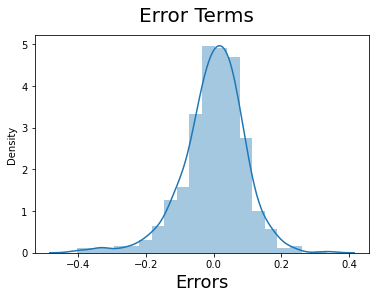

In [65]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Making Prediction
Now the model is developed it's the time to test the model now

We applied the scaling on the training set so we need to do the same scaling for the test set as well.

In [66]:
numeric_var = ['temp', 'hum', 'windspeed','cnt']
df_test[numeric_var] = scaler.fit_transform(df_test[numeric_var])

Spliting into X_test and y_test

In [67]:
y_test = df_test.pop('cnt')
X_test = df_test

### We will be using our model to make prediction

In [68]:
X_train_rfe3 = X_train_rfe3.drop(['const'], axis=1)
X_test_new = X_test[X_train_rfe3.columns]

In [69]:
#adding constant
X_test_new = sm.add_constant(X_test_new)

In [70]:
#making predictions
y_pred = lm3.predict(X_test_new)

# Model Evaluation

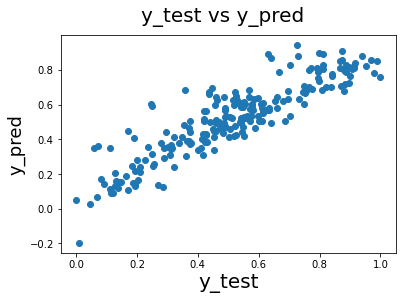

In [71]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=18)
plt.show()

In [72]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8010160387256292

### This is our final model and this is fairly simple to explain to the business users.

## We can use this to predict the daily count of daily bikes which are rented